# First-fit. Analysis BCD-output for an input signal of 55 dB

1 July 2023 Guido Cattani

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from scipy.stats import shapiro as shapiro

In [2]:
# read BCD output measured on skull simulator with a 55 dB ISTS input signal
def read_output():
    f_in = '/media/guido/LACIE/Cingle_Guido/Master/Implant/Primary_data/output_BCD_55dB.csv'
    p_in = Path(f_in)   
    df = pd.read_csv(p_in)
    df.set_index('Study_ID', inplace=True)
    return df

In [3]:
def list_freq():
    data = read_output()
    clmns = data.columns
    l = list()
    for clm in clmns:
        l.append(clm)
    return l

In [4]:
def new_freq():
    l = list_freq()
    l2 = list()
    for s in l:
        s = s.rstrip('_Hz')
        s = s.lstrip('f_')
        f = int(s)
        l2.append(f)
    return l2

In [5]:
def dict_freq():
    l = list_freq()
    l2 = new_freq()
    d = dict()
    #d1 = dict()
    for i in range(len(l)):
        d.update({l[i] : l2[i]})
    #    d1.update({l2[i] : l[i]})
    return d

In [6]:
def show_data():    
    # adjust column names, change format columns labels 'f_Hz' to f
    data = read_output()
    d = dict_freq()
    data = data.rename(columns=d)
    #data = data.drop(columns =[125, 160, 200, 250, 315, 400, 500, 630, 800])
    return data

In [7]:
def calculate_quantiles(df):
    quantiles = [0.10, 0.50, 0.90]
    q = (df.quantile(q=quantiles)).round(1)
    q = q.reset_index()
    diq = {0:'Output BCD on skull sim. P10', 1:'Output BCD on skull sim. P50', 2:'Output BCD on skull sim. P90'} 
    q = q.rename(index=diq)
    q.drop('index', axis=1, inplace=True)
    return q

In [8]:
def descriptive_stat(df):
    # calculate quantiles
    quantiles = df.quantile([0.1, 0.5, 0.9]).round(1)
    quantiles.index = ['P10', 'P50', 'P90']
 
    # calculate mean and standard deviation
    mean_values = (pd.DataFrame({'Mean': df.mean().round(1)})).T
    std_values = (pd.DataFrame({'St. dev.': df.std().round(1)})).T

    # perform Shapiro test 
    sht = shapiro_test_norm(df)

    # combine results into a single DataFrame
    res = pd.concat([quantiles, mean_values, std_values, sht])
    
    return res.round(1)

In [9]:
def shapiro_test_norm(df):
    # check normality with Shapiro-Wilk test
    shapiro_result = df.apply(lambda x: shapiro(x) if len(x) >= 3 else (float('nan'), float('nan')))
    
    shapiro_stats = shapiro_result.apply(lambda x: round(x[0], 3))
    p_values = shapiro_result.apply(lambda x: round(x[1], 3))
    is_normal = p_values >= 0.05
    
    shapiro_test = pd.DataFrame({
        'Shapiro test statistic': shapiro_stats,
        'p-value': p_values,
        'normally distributed': is_normal
    }).transpose()
    
    return shapiro_test

In [10]:
# show tabel with BCD output measured on skull simulator with a 55 dB ISTS input signal
data1 = show_data()
data1

,250,315,400,500,630,800,1000,1250,1600,2000,2500,3150,4000,5000,6300,8000
Study_ID,,,,,,,,,,,,,,,,
34,45.3,47.7,52.8,65.1,71.1,69.7,65.6,69.6,72.7,69.2,66.4,65.8,61.0,58.2,57.3,49.2
35,44.8,48.1,55.9,70.5,77.7,77.8,73.6,73.8,77.0,74.5,65.8,61.2,61.4,63.0,63.1,54.4
43,45.5,48.7,56.2,70.9,78.3,78.6,75.1,75.2,75.4,70.4,64.8,64.7,63.4,61.7,59.4,50.4
47,45.4,47.9,54.1,68.3,75.6,76.0,72.8,73.0,71.9,63.6,57.4,59.9,61.0,59.5,56.9,48.1
50,44.4,47.6,57.2,70.2,77.0,77.1,73.6,74.5,74.0,67.0,61.3,62.8,63.6,63.9,63.0,53.8
53,46.1,49.1,57.8,73.3,80.7,80.6,75.8,73.4,70.9,62.8,58.7,60.3,60.6,60.2,59.1,50.2
54,46.5,50.1,59.6,74.4,81.6,81.5,77.1,75.6,73.9,67.1,63.5,63.8,61.6,60.0,58.7,50.2
56,47.6,51.1,59.5,74.1,81.2,81.3,77.7,78.8,78.8,72.3,67.8,69.1,68.2,66.2,63.6,54.5
59,46.4,49.9,59.9,74.1,80.9,80.6,76.0,73.2,70.2,63.5,57.9,60.2,61.8,59.8,55.7,46.6


In [11]:
des_stat = descriptive_stat(data1)
des_stat

,250,315,400,500,630,800,1000,1250,1600,2000,2500,3150,4000,5000,6300,8000
P10,44.8,47.7,55.3,70.0,76.9,77.0,73.5,72.6,70.8,63.6,58.6,60.2,58.9,59.1,56.5,47.6
P50,45.8,48.8,57.2,71.5,78.6,78.9,75.1,74.5,73.9,67.2,62.1,62.2,62.4,60.7,59.2,50.3
P90,46.5,50.1,60.2,74.3,81.2,81.3,76.8,77.6,77.4,71.9,65.9,66.0,63.8,63.9,63.0,53.9
Mean,45.8,48.9,57.5,71.7,78.7,78.6,74.7,74.5,74.1,68.0,62.4,62.9,62.2,61.1,59.3,50.6
St. dev.,0.7,1.1,2.2,2.4,2.5,2.6,2.5,2.4,2.8,3.4,3.3,2.6,2.4,2.3,2.6,2.5
Shapiro test statistic,0.971,0.974,0.961,0.92,0.886,0.795,0.739,0.966,0.972,0.953,0.927,0.941,0.945,0.981,0.978,0.958
p-value,0.783,0.834,0.563,0.1,0.023,0.001,0.0,0.667,0.806,0.408,0.138,0.249,0.302,0.944,0.905,0.497
normally distributed,True,True,True,True,False,False,False,True,True,True,True,True,True,True,True,True


In [12]:
# name file descriptive stat results
f_ar = "output_firstfit_55dB.csv"

# save descriptive stat to file
d_ar = "/media/guido/LACIE/Cingle_Guido/Master/Implant/Analysis_Results/"
p_ar = Path(d_ar + f_ar)
des_stat.to_csv(p_ar)

In [13]:
# calculation quantiles
q = calculate_quantiles(data1)

# convert Pandas object in numpy array
lf = new_freq()
frqc = np. array(lf , dtype=int)
p10 = q.iloc[0].T.to_numpy()
median = q.iloc[1].T.to_numpy()
p90 = q.iloc[2].T.to_numpy()
bh5 = data1.T.to_numpy()
len(bh5)

16

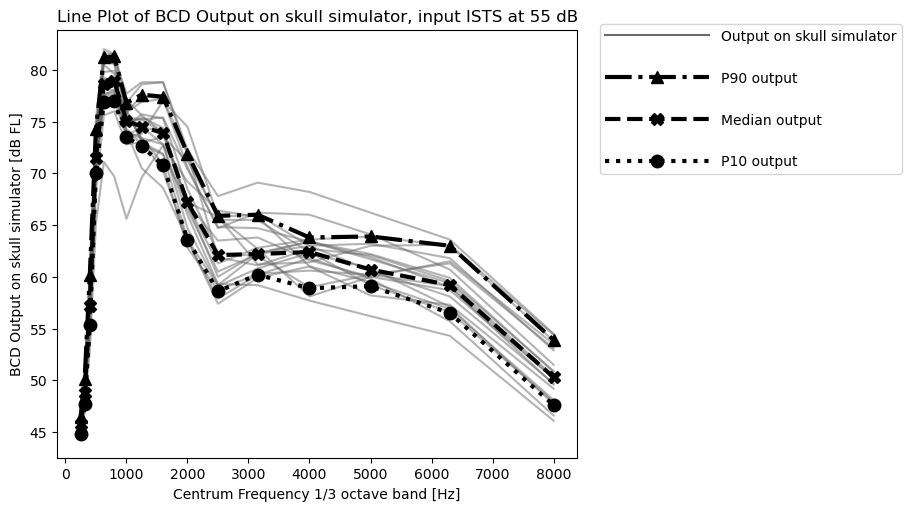

In [14]:
# make a figure to plot BCD output

plt.rcParams['axes.facecolor'] = 'white'

fig, (ax) = plt.subplots(1, constrained_layout=True)

fig.set_figheight(5)
fig.set_figwidth(9)

# make the line plot

ax.set(xlabel='Centrum Frequency 1/3 octave band [Hz]', ylabel='BCD Output on skull simulator [dB FL]',
       title='Line Plot of BCD Output on skull simulator, input ISTS at 55 dB')

# plot lines based on numpy arrays
ax.plot(frqc, bh5, color="dimgrey", alpha=0.5, label='Output FL BAHA5P')
ax.plot(frqc, median, color='black', marker='X', linestyle='dashed', linewidth=3, markersize=9)
ax.plot(frqc, p10, color='black', marker='o', linestyle='dotted', linewidth=3, markersize=9)
ax.plot(frqc, p90, color='black', marker='^', linestyle='dashdot', linewidth=3, markersize=9)

# make a legend
leg_line = mlines.Line2D([], [], color="dimgrey", label='Output on skull simulator')

leg_p90 = mlines.Line2D([], [], color='black', marker='^', linestyle='dashdot', 
                            linewidth=3, markersize=9, label='P90 output')
leg_med = mlines.Line2D([], [], color='black', marker='X', linestyle='dashed', 
                            linewidth=3, markersize=9, label='Median output')
leg_p10 = mlines.Line2D([], [], color='black', marker='o', linestyle='dotted', 
                            linewidth=3, markersize=9, label='P10 output')
     
leg = plt.legend(handles=[leg_line, leg_p90, leg_med, leg_p10], 
                 bbox_to_anchor=(1.03, 1.03), loc='upper left', labelspacing=2., handlelength=7.5)

# save the figure
plt.savefig('/media/guido/LACIE/Cingle_Guido/Master/Implant/Analysis_Graphs/output_firstfit_55dB.tiff', 
            transparent=False, dpi=500, bbox_inches="tight")

plt.show() # show the figure